# Metrics sensitivity to time horizon

The purpose of this notebook is to assess the sensitivity of climate metrics for a range of time horizons (e.g. $[20-100]$ years).

In [1]:
# Import librairies
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Climate functions
from aerocm.metrics.aviation_climate_metrics_calculation import AviationClimateMetricsCalculation

In [2]:
# --- Set parameters ---

## Climate model
climate_model = "FaIR"
start_year = 1940

## Metrics
time_horizon = list(range(15,110,5))

## Species
species_profile = 'pulse'
profile_start_year = 2020
species_list = ["Contrails", "NOx - ST O3 increase", "NOx - CH4 decrease and induced", "H2O", "Soot", "Sulfur"]

In [3]:
# --- Calculate metrics ---

results = AviationClimateMetricsCalculation(
    climate_model,
    start_year,
    time_horizon,
    species_profile,
    profile_start_year,
    species_list   
).run()

In [6]:
# --- Store data ---

gwp_rf = np.zeros((len(time_horizon), 6))
gwp_erf = np.zeros((len(time_horizon), 6))
gtp = np.zeros((len(time_horizon), 6))
ratr = np.zeros((len(time_horizon), 6))
for k, th in enumerate(time_horizon):
    for i, specie in enumerate(species_list):
        metrics = results[th][specie]
        gwp_rf[k, i] = metrics["gwp_rf"]
        gwp_erf[k, i] = metrics["gwp_erf"]
        gtp[k, i] = metrics["gtp"]
        ratr[k, i] = metrics["ratr"]

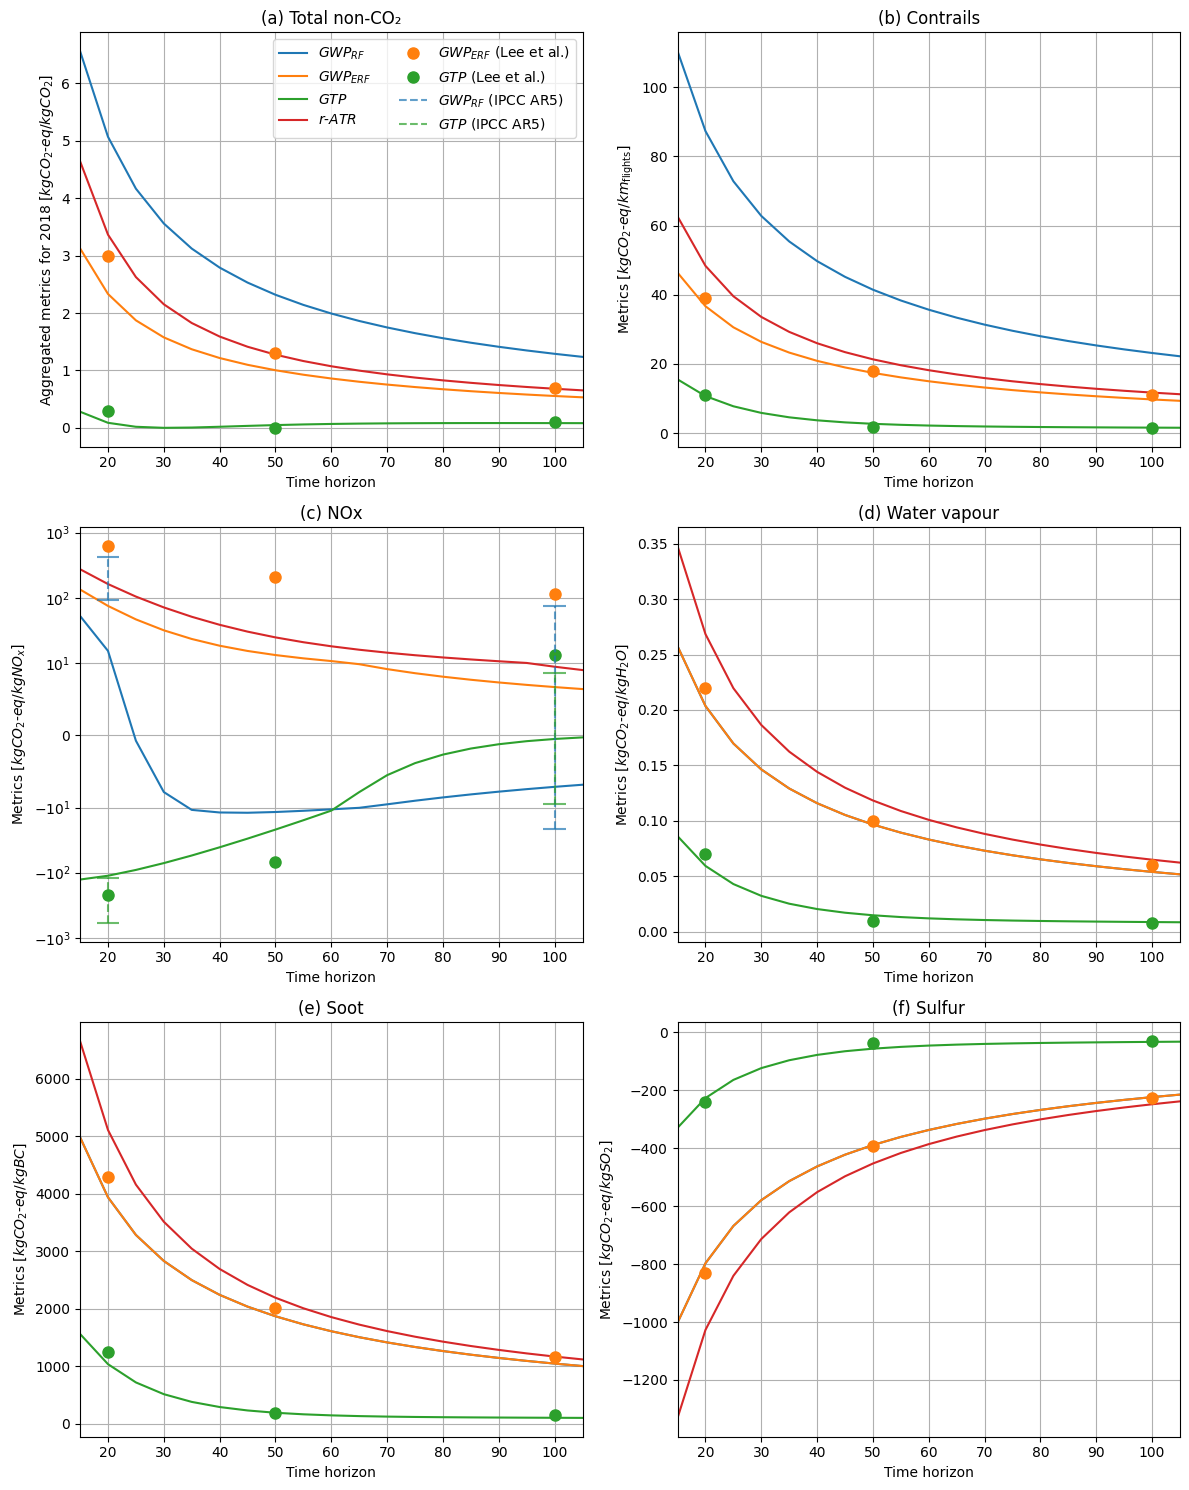

In [7]:
# --- Plot ---

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Ratio based on 2018 data
ratio_contrails = 61.3/1033.7 # Million km / MtCO2
ratio_nox = 1.4*46/14/1033.7 # MtNOx / MtCO2
ratio_h2o = 382.55/1033.7 # MtH2O / MtCO2
ratio_soot = 0.0093/1033.7 # MtBC / MtCO2
ratio_sulfur = 0.37/1033.7 # MtSOx / MtCO2

for i, ax in enumerate(axes.flat):
    if i == 0:
        x_axis = time_horizon
        ax.plot(x_axis, ratio_contrails*gwp_rf[:, i+0]+ratio_nox*(gwp_rf[:, i+2]+gwp_rf[:, i+1])+ratio_h2o*gwp_rf[:, i+3]+ratio_soot*gwp_rf[:, i+4]+ratio_sulfur*gwp_rf[:, i+5], label=r'$GWP_{RF}$', color='C0')
        ax.plot(x_axis, ratio_contrails*gwp_erf[:, i+0]+ratio_nox*(gwp_erf[:, i+2]+gwp_erf[:, i+1])+ratio_h2o*gwp_erf[:, i+3]+ratio_soot*gwp_erf[:, i+4]+ratio_sulfur*gwp_erf[:, i+5], label=r'$GWP_{ERF}$', color='C1')
        ax.plot(x_axis, ratio_contrails*gtp[:, i+0]+ratio_nox*(gtp[:, i+2]+gtp[:, i+1])+ratio_h2o*gtp[:, i+3]+ratio_soot*gtp[:, i+4]+ratio_sulfur*gtp[:, i+5], label=r'$GTP$', color='C2')
        ax.plot(x_axis, ratio_contrails*ratr[:, i+0]+ratio_nox*(ratr[:, i+2]+ratr[:, i+1])+ratio_h2o*ratr[:, i+3]+ratio_soot*ratr[:, i+4]+ratio_sulfur*ratr[:, i+5], label=r'$r\text{-}ATR$', color='C3')
        ax.plot(20, 3, marker="o", color="C1", markersize=8, label=r'$GWP_{ERF}$ (Lee et al.)', linestyle="None")
        ax.plot(50, 1.3, marker="o", color="C1", markersize=8)
        ax.plot(100, 0.7, marker="o", color="C1", markersize=8)
        ax.plot(20, 0.3, marker="o", color="C2", markersize=8, label=r'$GTP$ (Lee et al.)', linestyle="None")
        ax.plot(50, 0.0, marker="o", color="C2", markersize=8)
        ax.plot(100, 0.1, marker="o", color="C2", markersize=8)
        ax.vlines(x=10, ymin=0, ymax=1, color="C0", label=r'$GWP_{RF}$ (IPCC AR5)', linestyle="--", alpha=0.7)
        ax.vlines(x=110, ymin=0, ymax=1, color="C2", label=r'$GTP$ (IPCC AR5)', linestyle="--", alpha=0.7)
        ax.legend(ncol=2)
        ax.set_ylabel(r'Aggregated metrics for 2018 [$kgCO_2\text{-}eq/kgCO_2$]')
    elif i == 1:
        ax.plot(x_axis, gwp_rf[:, i-1], label=r'$GWP_{RF}$', color='C0')
        ax.plot(x_axis, gwp_erf[:, i-1], label=r'$GWP_{ERF}$', color='C1')
        ax.plot(x_axis, gtp[:, i-1], label=r'$GTP$', color='C2')
        ax.plot(x_axis, ratr[:, i-1], label=r'$r\text{-}ATR$', color='C3')
        ax.plot(20, 39, marker="o", color="C1", markersize=8, label=r'$GWP_{ERF}$ (Lee et al.)')
        ax.plot(50, 18, marker="o", color="C1", markersize=8)
        ax.plot(100, 11, marker="o", color="C1", markersize=8)
        ax.plot(20, 11, marker="o", color="C2", markersize=8, label=r'$GTP$ (Lee et al.)')
        ax.plot(50, 1.8, marker="o", color="C2", markersize=8)
        ax.plot(100, 1.5, marker="o", color="C2", markersize=8)
        ax.set_ylabel(r'Metrics [$kgCO_2\text{-}eq/km_{\text{flights}}$]')
    elif i == 2:
        ax.plot(x_axis, gwp_rf[:, i-1]+gwp_rf[:, i], color='C0')
        ax.plot(x_axis, gwp_erf[:, i-1]+gwp_erf[:, i], color='C1')
        ax.plot(x_axis, gtp[:, i-1]+gtp[:, i], color='C2')
        ax.plot(x_axis, ratr[:, i-1]+ratr[:, i], color='C3')
        ax.plot(20, 619, marker="o", color="C1", markersize=8, label=r'$GWP_{ERF}$ (Lee et al.)')
        ax.plot(50, 205, marker="o", color="C1", markersize=8)
        ax.plot(100, 114, marker="o", color="C1", markersize=8)
        ax.plot(20, -222, marker="o", color="C2", markersize=8, label=r'$GTP$ (Lee et al.)')
        ax.plot(50, -69, marker="o", color="C2", markersize=8)
        ax.plot(100, 13, marker="o", color="C2", markersize=8)
        ax.vlines(x=20, ymin=92, ymax=415, color="C0", label=r'$GWP_{RF}$ (IPCC AR5)', linestyle="--", alpha=0.7)
        ax.hlines(xmin=18, xmax=22, y=92, color="C0", alpha=0.7)
        ax.hlines(xmin=18, xmax=22, y=415, color="C0", alpha=0.7)
        ax.vlines(x=100, ymin=-21, ymax=75, color="C0", linestyle="--", alpha=0.7)
        ax.hlines(xmin=98, xmax=102, y=-21, color="C0", alpha=0.7)
        ax.hlines(xmin=98, xmax=102, y=75, color="C0", alpha=0.7)
        ax.vlines(x=20, ymin=-590, ymax=-121, color="C2", label=r'$GTP$ (IPCC AR5)', linestyle="--", alpha=0.7)
        ax.hlines(xmin=18, xmax=22, y=-121, color="C2", alpha=0.7)
        ax.hlines(xmin=18, xmax=22, y=-590, color="C2", alpha=0.7)
        ax.vlines(x=100, ymin=-9.5, ymax=8.6, color="C2", linestyle="--", alpha=0.7)
        ax.hlines(xmin=98, xmax=102, y=-9.5, color="C2", alpha=0.7)
        ax.hlines(xmin=98, xmax=102, y=8.6, color="C2", alpha=0.7)
        ax.set_ylabel(r'Metrics [$kgCO_2\text{-}eq/kgNO_x$]')
        ax.set_yscale('symlog', linthresh=10)

    else:
        x_axis = time_horizon
        ax.plot(x_axis, gwp_rf[:, i], label=r'$GWP_{RF}$', color='C0')
        ax.plot(x_axis, gwp_erf[:, i], label=r'$GWP_{ERF}$', color='C1')
        ax.plot(x_axis, gtp[:, i], label=r'$GTP$', color='C2')
        ax.plot(x_axis, ratr[:, i], label=r'$r\text{-}ATR$', color='C3')
        if i==3:
            ax.plot(20, 0.22, marker="o", color="C1", markersize=8, label=r'$GWP_{ERF}$ (Lee et al.)')
            ax.plot(50, 0.1, marker="o", color="C1", markersize=8)
            ax.plot(100, 0.06, marker="o", color="C1", markersize=8)
            ax.plot(20, 0.07, marker="o", color="C2", markersize=8, label=r'$GTP$ (Lee et al.)')
            ax.plot(50, 0.01, marker="o", color="C2", markersize=8)
            ax.plot(100, 0.008, marker="o", color="C2", markersize=8)
            ax.set_ylabel(r'Metrics [$kgCO_2\text{-}eq/kgH_2O$]')
        elif i==4:
            ax.plot(20, 4288, marker="o", color="C1", markersize=8, label=r'$GWP_{ERF}$ (Lee et al.)')
            ax.plot(50, 2018, marker="o", color="C1", markersize=8)
            ax.plot(100, 1166, marker="o", color="C1", markersize=8)
            ax.plot(20, 1245, marker="o", color="C2", markersize=8, label=r'$GTP$ (Lee et al.)')
            ax.plot(50, 195, marker="o", color="C2", markersize=8)
            ax.plot(100, 161, marker="o", color="C2", markersize=8)
            ax.set_ylabel(r'Metrics [$kgCO_2\text{-}eq/kgBC$]')
        else:
            ax.plot(20, -832, marker="o", color="C1", markersize=8, label=r'$GWP_{ERF}$ (Lee et al.)')
            ax.plot(50, -392, marker="o", color="C1", markersize=8)
            ax.plot(100, -226, marker="o", color="C1", markersize=8)
            ax.plot(20, -241, marker="o", color="C2", markersize=8, label=r'$GTP$ (Lee et al.)')
            ax.plot(50, -38, marker="o", color="C2", markersize=8)
            ax.plot(100, -31, marker="o", color="C2", markersize=8)
            ax.set_ylabel(r'Metrics [$kgCO_2\text{-}eq/kgSO_2$]')
    ax.set_xlim(min(time_horizon),max(time_horizon))
    ax.set_xlabel('Time horizon')
    ax.grid(True)
    if i == 0:
        ax.set_title('(a) Total non-CO₂')
    elif i == 1:
        ax.set_title('(b) Contrails')
    elif i == 2:
        ax.set_title('(c) NOx')
    elif i == 3:
        ax.set_title('(d) Water vapour')
    elif i == 4:
        ax.set_title('(e) Soot')
    elif i == 5:
        ax.set_title('(f) Sulfur')

plt.tight_layout()
plt.savefig("figures/metric_calculation.pdf")
plt.show()